# Fault Scarp Analysis GUI

Franklin Wolfe
Harvard University + GNS Science
2018

This code will allow you to interactively determine x and z values to represent the footwall, hanging wall, and scarp components of a fault along a profile. You will filter the data into three separate subgroups representing these features. You can check you picks in a simplified diagram afterwards. The data will be saved to a csv file that can then be used for the Fault Scarp Slip Statistics Code in Matlab.

In [581]:
#Import the packages needed
import pandas as pd
import numpy as np
import qgrid
%matplotlib nbagg
import matplotlib.pyplot as plt
import os

In [705]:
cd ..

/Users/franklinwolfe/Google Drive/Drum Mts Fault Zone/GIS and other data/Profiles/Extracted_Elevations_Ages


In [706]:
cd processed/

/Users/franklinwolfe/Google Drive/Drum Mts Fault Zone/GIS and other data/Profiles/Extracted_Elevations_Ages/processed


In [720]:
cd Output_Profile_lines/

/Users/franklinwolfe/Google Drive/Drum Mts Fault Zone/GIS and other data/Profiles/Extracted_Elevations_Ages/Output_Profile_lines


In [723]:
ls

Icon?           Section_11.csv  Section_14.csv  Section_17.csv  Section_4.csv
Section_1.csv   Section_12.csv  Section_15.csv  Section_2.csv   Section_9.csv
Section_10.csv  Section_13.csv  Section_16.csv  Section_3.csv


In [736]:
#Working directory must be location of this folder/file
#This is the input you change to investigate the next fault scarp.
data = "Section_1.csv"
data1 = pd.read_csv(data, header = None)

In [737]:
data1

,0,1,2,3,4
0,1,0.0,1518.300049,18500.0,36514.0
1,1,1.0,1518.300049,18500.0,36514.0
2,1,2.0,1518.300049,18500.0,36514.0
3,1,3.0,1518.300049,18500.0,36514.0
4,1,4.0,1518.099976,18500.0,36514.0
5,1,5.0,1518.099976,18500.0,36514.0
6,1,6.0,1518.099976,18500.0,36514.0
7,1,7.0,1518.099976,18500.0,36514.0
8,1,8.0,1518.099976,18500.0,36514.0
9,1,9.0,1517.900024,18500.0,36514.0


In [738]:
#Call the widget
qgrid_widget = qgrid.show_grid(data1,show_toolbar=True)

<IPython.core.display.Javascript object>


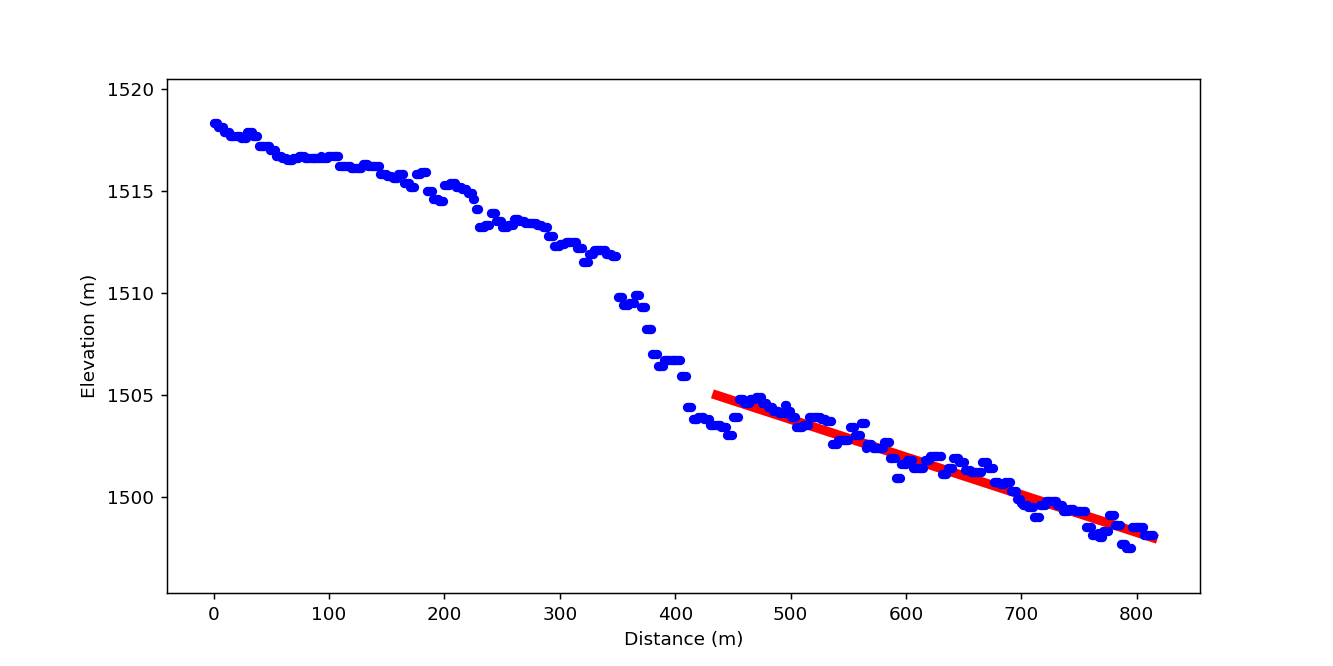

In [743]:
#All Data - this will plot the blue scatter plot in the background and will not change when you play with the widget
a = data1[1]
b = data1[2]

#The updated data after widget manipulation
qgrid_df = qgrid_widget.get_changed_df()
x = qgrid_df[1]
z = qgrid_df[2]

#plot the figure
fig, ax = plt.subplots(figsize = (10,5))
fit = np.polyfit(x, z, deg = 1)
linefw, = ax.plot(x, fit[0] * x + fit[1], linewidth=5, color = 'red')
scatter, = ax.plot(a, b, ms = 4, color = 'b', marker = 'o', ls = '')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Elevation (m)')

#widget function
def handle_filter_changed(event,widget):
    qgrid_df = qgrid_widget.get_changed_df()
    x = qgrid_df[1]
    z = qgrid_df[2]
    fit = np.polyfit(x, z, deg = 1)
    linefw.set_data(x , fit[0] * x + fit[1])
    fig.canvas.draw()
    scatter.set_data(a, b)
    print(fig.canvas.draw())
    
#turn widget on
qgrid_widget.on('filter_changed', handle_filter_changed)
    

In [742]:
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [751]:
FW = qgrid_widget.get_changed_df()[[1,2]]

In [752]:
HW = qgrid_widget.get_changed_df()[[1,2]]

In [750]:
SC = qgrid_widget.get_changed_df()[[1,2]]
SC.dropna(axis=1);

<IPython.core.display.Javascript object>


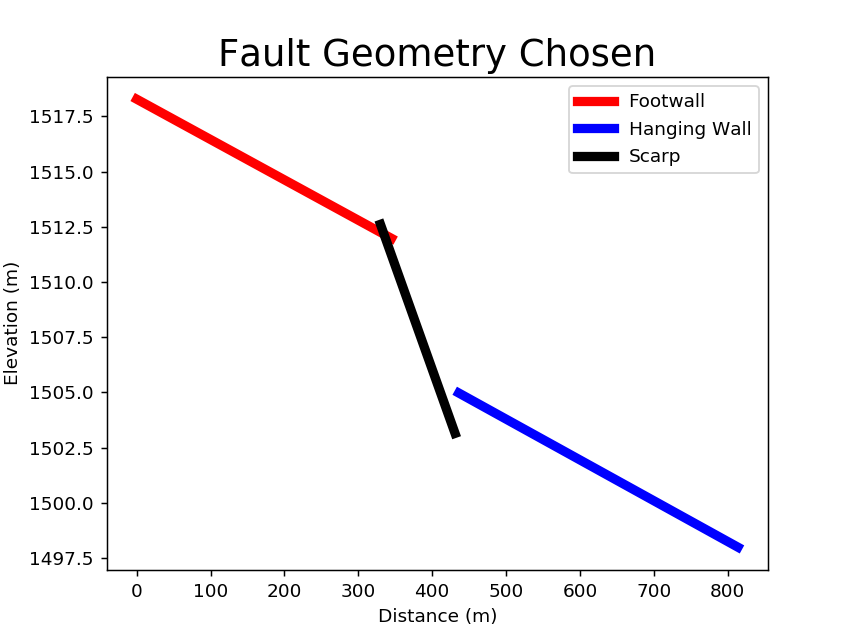

Text(0,0.5,'Elevation (m)')

In [755]:
#Verification
# Create lines from footwall, hanging wall, and scarp to test whether your picks were accurate

#create figure
fig = plt.figure()
plt.title('Fault Geometry Chosen', fontsize = 20)

#create best fit lines for the given data inputs (FW, HW, SC)
fw_fit = np.polyfit(FW[1],FW[2],1)
fw_fit_fn = np.poly1d(fw_fit)

hw_fit = np.polyfit(HW[1],HW[2],1)
hw_fit_fn = np.poly1d(hw_fit)

sc_fit = np.polyfit(SC[1],SC[2],1)
sc_fit_fn = np.poly1d(sc_fit)

#plot
plt.plot(FW[1],fw_fit_fn(FW[1]),'r', linewidth = 5, label = 'Footwall')
plt.plot(HW[1],hw_fit_fn(HW[1]),'b', linewidth = 5, label = 'Hanging Wall')
plt.plot(SC[1],sc_fit_fn(SC[1]),'k', linewidth = 5, label = 'Scarp')

#add legend
plt.legend(['Footwall', 'Hanging Wall', 'Scarp'])
plt.xlabel('Distance (m)')
plt.ylabel('Elevation (m)')


In [690]:
#Appends data to dataframe and saves as csv file named "processed [filename]"
#This file will be located in the same folder as the original csv file you have analyzed.

Ages = pd.DataFrame(data1[[4,5]].values[0]).transpose()
frames = [FW,HW,SC,Ages]
output = pd.concat(frames,axis=1,ignore_index=True)


num = '1'

In [691]:
output.to_csv('processed_' + num + data, index = False, header = False)